In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import glob
from sklearn.linear_model import LinearRegression
import math as mt

In [2]:
files2019=glob.glob("D:/ProgramasJupyter/HIGI/PrediccionINE/Archivos2019/*.txt")
files2020=glob.glob("D:/ProgramasJupyter/HIGI/PrediccionINE/Archivos2020/*.txt")
#Cargamos los archivos del directorio en un arreglo
#Creamos 2 arreglos porque el formato del 2020 es diferente al del 2019 

In [3]:
#Comienza sección de código correspondiente al tratamiento de datos del 2019
l_mpo_gral_19=[]
l_sec_gral_19=[]
for i in range(0, len(files2019)):
    data_19 = pd.read_csv(files2019[i], usecols=[0,1,2,3,9])
    data_ent_19=data_19[data_19['ENTIDAD']==11]
    mpos_19=np.unique(data_ent_19['MUNICIPIO'])
    secs_19=np.unique(data_ent_19['SECCION'])
    l_mpo_19=[]
    l_sec_19=[]
    for mpo_19 in mpos_19[1:]:
        l_mpo_19.append(data_ent_19[data_ent_19['MUNICIPIO']==mpo_19]['LISTA'].sum())
    l_mpo_gral_19.append(l_mpo_19)
    for sec_19 in secs_19[1:]:
        l_sec_19.append(data_ent_19[data_ent_19['SECCION']==sec_19]['LISTA'].sum())
    
    temp=np.zeros(3161)
    temp[:len(l_sec_19)]=l_sec_19
    l_sec_gral_19.append(temp)
    
l_mpo_gral_array_19=np.asarray(l_mpo_gral_19)

l_sec_gral_array_19=np.asarray(l_sec_gral_19)

#Termina sección de código correspondiente al tratamiento de datos del 2019

In [4]:
#Comienza sección de código correspondiente al tratamiento de datos del 2020
l_mpo_gral_20=[]
l_sec_gral_20=[]
for j in range(0, len(files2020)):
    data_20 = pd.read_csv(files2020[j], usecols=[0,1,2,3,13])
    data_ent_20=data_20[data_20['ENTIDAD']==11]
    mpos_20=np.unique(data_ent_20['MUNICIPIO'])
    secs_20=np.unique(data_ent_20['SECCION'])
    l_mpo_20=[]
    l_sec_20=[]
    for mpo_20 in mpos_20[1:]:
        l_mpo_20.append(data_ent_20[data_ent_20['MUNICIPIO']==mpo_20]['LISTA_NAL'].sum())
    l_mpo_gral_20.append(l_mpo_20)
    
    for sec_20 in secs_20[1:]:
        l_sec_20.append(data_ent_20[data_ent_20['SECCION']==sec_20]['LISTA_NAL'].sum()) 
    
    temp=np.zeros(3161)
    temp[:len(l_sec_20)]=l_sec_20
    l_sec_gral_20.append(temp)

l_mpo_gral_array_20=np.asarray(l_mpo_gral_20)
l_sec_gral_array_20=np.asarray(l_sec_gral_20)
#Termina sección de código correspondiente al tratamiento de datos del 2020

In [14]:
#Aquí vamos a unir los resultados obtenidos hasta ahora para los municipios y secciones
mun_total=np.concatenate((l_mpo_gral_array_19,l_mpo_gral_array_20))
sec_total=np.concatenate((l_sec_gral_array_19,l_sec_gral_array_20))
print(mun_total.shape)

(16, 46)


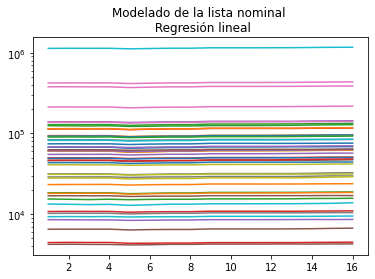

In [37]:
#Para las regresiones de los munucipios
x=np.linspace(1,16,16).reshape(-1,1)
linR=LinearRegression()
mm=[]
bm=[]
predm=[]
for i in range(46):
    linR.fit(x,mun_total[:,i])
    mm.append(int(linR.coef_[0]))
    bm.append(int(linR.intercept_))
    predm.append(int(linR.predict(np.array(18.0).reshape(1,-1))))

pm=[]
for i in range(len(predm)):
    am=mt.ceil(predm[i]/750)
    pm.append(am)
    
pmm=np.asarray(pm)
for i in range(46):
    plt.title("Modelado de la lista nominal \n Regresión lineal")
    plt.yscale("log")
    plt.plot(x, mun_total[:,i])    
    plt.savefig("RegresiónLinealMpo.png")
#print(pmm.sum())



In [73]:
#Para las regresiones de las secciones
x=np.linspace(1,16,16).reshape(-1,1)
linR=LinearRegression()
ms=[]
bs=[]
preds=[]
for i in range(3161):
    linR.fit(x,sec_total[:,i])
    ms.append(int(linR.coef_[0]))
    bs.append(int(linR.intercept_))
    preds.append(int(linR.predict(np.array(18.0).reshape(1,-1))))

ps=[]
for i in range(3161):
    ass=mt.ceil(preds[i]/750)
    ps.append(ass)

smm=np.asarray(ps)
    


In [32]:
np.savetxt('resultados.txt', (np.linspace(1,46,46), pmm))